### Business Understanding

Team - Akshay Saxena

This challenge proposes a problem where a prediction is required to identify a shoper's likelihood to return to the stores considering his past shopping behaviour.

The dataset file is attached in the zip file along with this notebook for reference. 

Dataset contains customer id's with their different visits to the mall on different dates. Units purchased and total spend details are provided for each visit.

##### The specific Questions of Interest are:
1. Can we predict and build a model that can identify a shopper's likelihood to return to the store next week (Sun - Sat)?

2. Should we use the entire tenure of the customer or perhaps a most recent time period?

Desired Targets:

1. To identify shopper's likelihood to return to the store next week (Sun - Sat)
2. To identify customer groups who are more liable towards exhibiting some positive campaign activity despite being somewhat lower-value.

### Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from scipy.stats.stats import pearsonr

### Load training data set from CSV file

In [90]:
df = pd.read_csv("data_science_challenge_samp_18.csv", parse_dates=['order_date'])

### Dealing with missing values 'nan' with a test statistic

In [91]:
df.isnull().sum()

cust_id            0
order_date         0
lane_number        0
total_spend        0
units_purchased    0
dtype: int64

In [92]:
df['units_purchased'] = pd.to_numeric(df.units_purchased)
df['total_spend'] = pd.to_numeric(df.total_spend, errors='coerce')

In [93]:
df.dtypes

cust_id                     int64
order_date         datetime64[ns]
lane_number                 int64
total_spend               float64
units_purchased             int64
dtype: object

### Counting  monthly number of customers

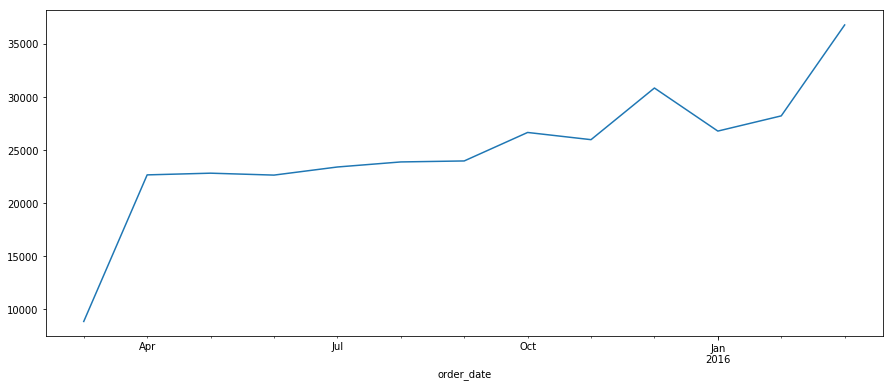

In [94]:
Month = df['order_date'].groupby(df.order_date.dt.to_period("M")).agg('count').plot()

This graph shows an improvement throughout 12 months. Customers visits to store are increasing month by month and goes up to 35000+ until 27th March, 2016. I am curious to know which customers are making this graph so interesting. Let's find out!

First Let's analyze how the features are connected to each other so we pick units_purchased and total_spend column. As of know my understanding is that both columns should be correlated to each other as units_purchased makes the total_spend higher but there is no harm to write a line of python code and proof our understanding.

In [95]:
units_purchased  = df['units_purchased']
total_spend = df['total_spend']
pearsonr(units_purchased,total_spend)

(nan, 1.0)

As we saw that both columns are correlated so we will pick only one attribute for analysis as both attributes are going to
contribute the same information.

I am interested to think as a store's owner perspective and this graph gives me insight that the total_spend is going high on different dates but I am curious to know which customers are they who are reaching at the peak. Are they same customers or different? If I am able to find out those customers then I can say that those customers will return to the store next week

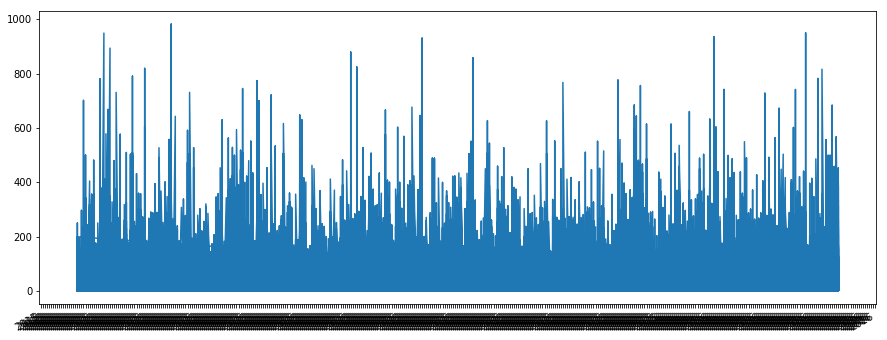

In [96]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(df['order_date'],total_spend)
plt.gcf().autofmt_xdate()

In [97]:
df['month'] = df.order_date.dt.month.T
df['day'] = df.order_date.dt.day.T
df['year'] = df.order_date.dt.year.T

### Every customer activities with all days during the year

In [98]:
df[['total_spend','month','day','year','cust_id']].groupby(['year','cust_id','month','day','total_spend']).agg('sum').reset_index()
#df[['units_purchased','order_date','cust_id']].groupby(['cust_id']).agg('sum')
#each_day.to_csv('each_day.csv')

,year,cust_id,month,day,total_spend
0,2015,4005940437,3,20,7.99
1,2015,4005940437,3,21,3.66
2,2015,4005940437,3,23,28.98
3,2015,4005940437,3,25,7.89
4,2015,4005940437,3,27,20.88
5,2015,4005940437,3,28,6.70
6,2015,4005940437,3,29,15.47
7,2015,4005940437,3,31,1.51
8,2015,4005940437,3,31,4.99
9,2015,4005940437,3,31,12.00


### Customers visit dates to the store and respective counts

In [99]:
cust_group_date = df.groupby(['cust_id','order_date'])['cust_id'].count().reset_index(name="count")
cust_group_date
#cust_group_date.sort_values(['count'], ascending=False)
#date=pd.to_datetime(cust_group_date['order_date']).date()

,cust_id,order_date,count
0,4005940437,2015-03-20,1
1,4005940437,2015-03-21,1
2,4005940437,2015-03-23,1
3,4005940437,2015-03-25,1
4,4005940437,2015-03-27,1
5,4005940437,2015-03-28,1
6,4005940437,2015-03-29,1
7,4005940437,2015-03-31,3
8,4005940437,2015-04-01,1
9,4005940437,2015-04-03,1


### Customers with most number of visits to the store

In [100]:
temp = df.groupby('cust_id').cust_id.count()
temp = pd.DataFrame(temp)
temp.columns.values[0] = 'count'
temp = temp1.sort_values(by=['count'], ascending=False)
temp.head()

,count
cust_id,
5183161534,543
4302370736,540
4257909036,533
4232061834,512
4014778637,438


We would need above stats for our predictive anaysis at later stage.

### RFM (Recency, Frequency, & Monetary) Model

The Best method which comes into mind while working on this problem is RFM model which is classic analytics and segmentation tool for identifying best customers.

Fundamentals of RFM - 

1) have made a purchase recently, 

2) make regular or frequent purchases with you, 

3) spend a large amount with you, are more likely to return to the store.

We do not need to generate any new training or testing attributes as we can easily RFM on our data set.

Recency - Order date is provided

Frequency - we have already computed frequencies(count) above

Montary value - Total spend and units purchased attributes are provided.

In [102]:
df['count'] = temp['count']

In [104]:
import datetime as dt
NOW = dt.datetime(2016,3,27)

In [138]:
rfmTable = df.groupby('cust_id').agg({'order_date': lambda x: (NOW - x.max()).days, 'count': lambda x: len(x), 'total_spend': lambda x: x.sum()})
rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'Recency', 
                         'count': 'Frequency', 
                         'total_spend': 'Monetary_value'}, inplace=True)

In [139]:
rfmTable.head()

,Recency,Frequency,Monetary_value
cust_id,,,
4005940437,0,202.0,2225.08
4005940737,5,7.0,63.15
4005941333,1,47.0,1359.24
4005941434,0,89.0,676.81
4005941533,2,79.0,2351.00


### Split the metrics

##### The easiest way to split metrics into segments is by using quartiles.
This gives us a starting point for the detailed analysis.
4 segments are easy to understand and explain

In [140]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [141]:
#last date available in our dataset
df['order_date'].max()

Timestamp('2016-03-27 00:00:00')

The last date we have is 2016-03-27 and we will use it for our analysis.

### Create a segmented RFM table

In [142]:
segmented_rfm = rfmTable
segmented_rfm.head()

,Recency,Frequency,Monetary_value
cust_id,,,
4005940437,0,202.0,2225.08
4005940737,5,7.0,63.15
4005941333,1,47.0,1359.24
4005941434,0,89.0,676.81
4005941533,2,79.0,2351.00


The lowest recency, highest frequency and monetary amounts are our best customers.

In [144]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

### Add segment numbers to the newly created segmented RFM table

In [147]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary_value'].apply(FMScore, args=('Monetary_value',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile
cust_id,,,,,,
4005940437,0,202.0,2225.08,1,1,1
4005940737,5,7.0,63.15,3,3,4
4005941333,1,47.0,1359.24,1,1,1
4005941434,0,89.0,676.81,1,1,1
4005941533,2,79.0,2351.00,2,1,1


Customer Analytics people use below table for analysing RFM score. it's proven and companies are getting benefited by applying marketig strategies as shown below in the table 

<img src="RFM.png"/>

In [150]:
#### Add a new column to combine RFM score: 111 is the highest score 
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
cust_id,,,,,,,
4005940437,0,202.0,2225.08,1,1,1,111
4005940737,5,7.0,63.15,3,3,4,334
4005941333,1,47.0,1359.24,1,1,1,111
4005941434,0,89.0,676.81,1,1,1,111
4005941533,2,79.0,2351.00,2,1,1,211


It is obvious that customer 4005944334 is not our best customer at all as it has 311 RFM score which is the worst

In [157]:
segmented_rfm[segmented_rfm['RFMScore']=='344'].sort_values('Monetary_value', ascending=False).head(10)

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
cust_id,,,,,,,
4355342537,4,4.0,89.17,3,4,4,344
7031733135,4,2.0,88.39,3,4,4,344
4610288436,4,6.0,88.33,3,4,4,344
5487381136,5,4.0,88.12,3,4,4,344
5479596834,5,5.0,87.73,3,4,4,344
6943132735,4,4.0,87.55,3,4,4,344
6754794734,4,5.0,87.50,3,4,4,344
6966805535,4,4.0,86.82,3,4,4,344
4445838035,5,5.0,86.80,3,4,4,344


### How many customers do we have in each segment?

In [162]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFMScore']=='444']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['f_quartile']==4]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['m_quartile']==4]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFMScore']=='244']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='111']))

Best Customers:  594
Loyal Customers:  3341
Big Spenders:  3123
Almost Lost:  769
Lost Customers:  617
Lost Cheap Customers:  823


### Let's visulaize our results

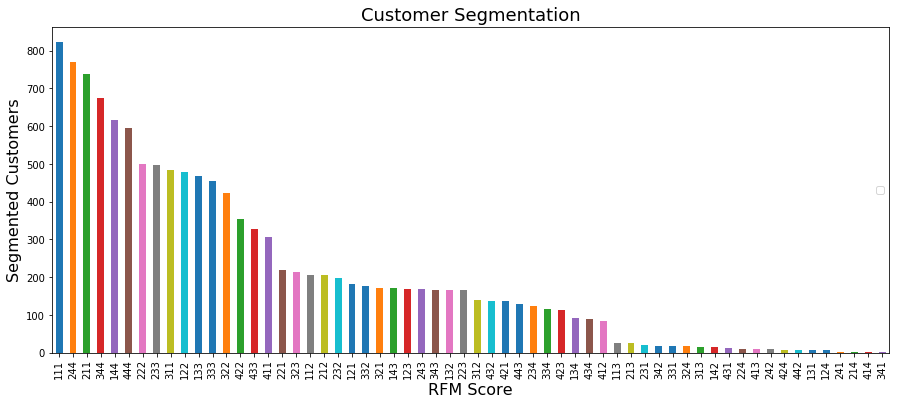

In [164]:
legends=['111 - Best Customers','X1X - Loyal Customers', 'XX1 - Big Spenders', '311 - Almost Lost', '411 - Lost Customers']
#plt.bar(pos,Happiness_Index_Male,color='blue',edgecolor='black')
#plt.bar(pos,Happiness_Index_Female,color='pink',edgecolor='black',bottom=Happiness_Index_Male)
#plt.xticks(pos, city)
plt.xlabel('RFM Score', fontsize=16)
plt.ylabel('Segmented Customers', fontsize=16)
plt.title('Customer Segmentation',fontsize=18)
plt.legend(legends, loc = 5)
segmented_rfm['RFMScore'].value_counts().plot(kind='bar')
plt.show()

We can find here a suggestion of key segments and then we can decide which segment to consider for further study.